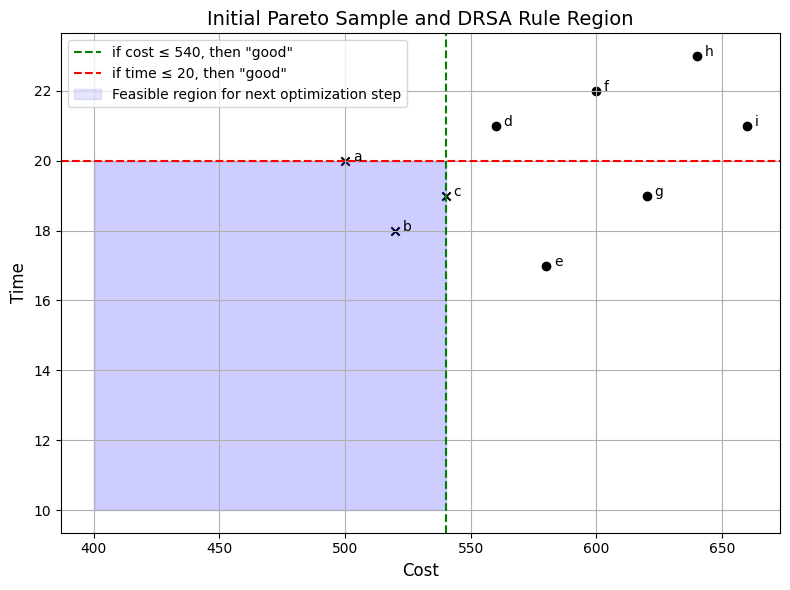

In [27]:
import matplotlib.pyplot as plt

# Define sample points (cost, time)
points = {
    "a": (500, 20),
    "b": (520, 18),
    "c": (540, 19),
    "d": (560, 21),
    "e": (580, 17),
    "f": (600, 22),
    "g": (620, 19),
    "h": (640, 23),
    "i": (660, 21),
}

# Define good and other classes
good = {"a", "b", "c"}
other = set(points.keys()) - good

# Plot setup
fig, ax = plt.subplots(figsize=(8, 6))

# Plot points
for label, (cost, time) in points.items():
    marker  = 'x' if label in good else 'o'
    color  = 'green' if label in good else 'red'
    ax.scatter(cost, time, marker=marker, color="black")
    ax.text(cost + 3, time, label, fontsize=10)

# Highlight rule-based decision region (cost ≤ 540, time ≤ 20)
x_line = 540
y_line = 20
ax.axvline(x=x_line, color='green', linestyle='--', label='if cost ≤ 540, then "good"')
ax.axhline(y=y_line, color='red', linestyle='--', label='if time ≤ 20, then "good"')
ax.fill_betweenx([10, y_line], 400, x_line, color='blue', alpha=0.1)

# Highlight region
ax.fill_betweenx([10, 20], 400, 540, color='blue', alpha=0.1, label='Feasible region for next optimization step')

# Labels and title
ax.set_xlabel('Cost', fontsize=12)
ax.set_ylabel('Time', fontsize=12)
ax.set_title('Initial Pareto Sample and DRSA Rule Region', fontsize=14)
ax.legend()

plt.grid(True)
plt.tight_layout()

plt.savefig('./graphs/Pareto Sample and DRSA Rule Region.pdf')
plt.show()

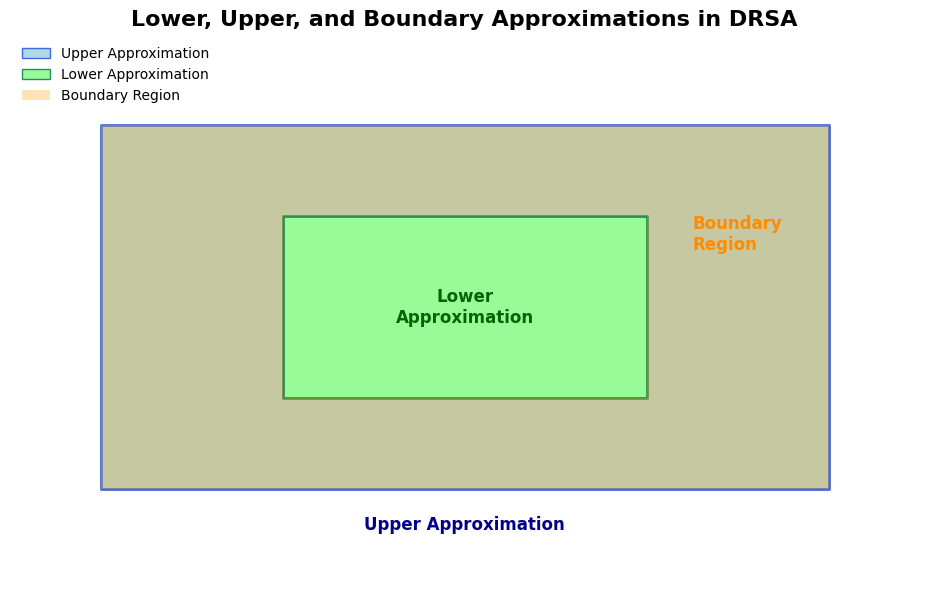

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Draw rectangles for approximations
upper_rect = patches.Rectangle((1, 1), 8, 4, linewidth=2, edgecolor='royalblue', facecolor='lightblue', label='Upper Approximation', joinstyle='round')
lower_rect = patches.Rectangle((3, 2), 4, 2, linewidth=2, edgecolor='seagreen', facecolor='palegreen', label='Lower Approximation', joinstyle='round')
ax.add_patch(upper_rect)
ax.add_patch(lower_rect)

# Boundary region: difference between upper and lower
boundary_rects = [
    patches.Rectangle((1, 1), 2, 4, linewidth=0, facecolor='orange', alpha=0.3),
    patches.Rectangle((7, 1), 2, 4, linewidth=0, facecolor='orange', alpha=0.3),
    patches.Rectangle((3, 1), 4, 1, linewidth=0, facecolor='orange', alpha=0.3),
    patches.Rectangle((3, 4), 4, 1, linewidth=0, facecolor='orange', alpha=0.3)
]
for rect in boundary_rects:
    ax.add_patch(rect)

# Add annotations
ax.text(5, 3, 'Lower\nApproximation', ha='center', va='center', fontsize=12, color='darkgreen', weight='bold')
ax.text(5, 0.6, 'Upper Approximation', ha='center', va='center', fontsize=12, color='darkblue', weight='bold')
ax.text(7.5, 3.8, 'Boundary\nRegion', ha='left', va='center', fontsize=12, color='darkorange', weight='bold')

# Legend (added for clarity)
custom_handles = [
    patches.Patch(facecolor='lightblue', edgecolor='royalblue', label='Upper Approximation'),
    patches.Patch(facecolor='palegreen', edgecolor='seagreen', label='Lower Approximation'),
    patches.Patch(facecolor='orange', alpha=0.3, label='Boundary Region')
]
ax.legend(handles=custom_handles, loc='upper left', fontsize=10, frameon=False)

# Visual formatting
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.set_aspect('equal')
ax.axis('off')
plt.title("Lower, Upper, and Boundary Approximations in DRSA", fontsize=16, weight='bold')
plt.tight_layout()

plt.savefig('./graphs/Lower_Upper_and_Boundary_Approximations.pdf')
plt.show()


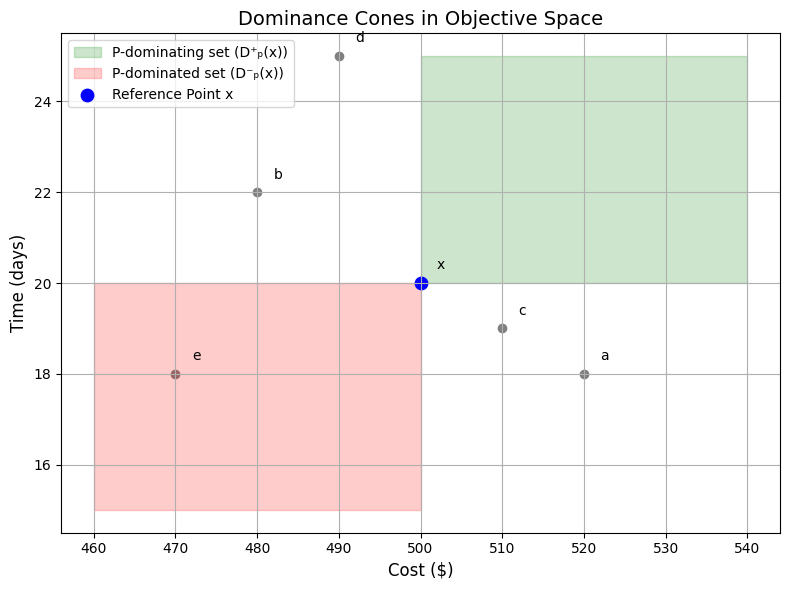

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Sample points in objective space (cost, time)
points = {
    "x": (500, 20),  # Reference point
    "a": (520, 18),
    "b": (480, 22),
    "c": (510, 19),
    "d": (490, 25),
    "e": (470, 18)
}

# Define reference point x
x_cost, x_time = points["x"]

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all points
for label, (cost, time) in points.items():
    color = 'black' if label == "x" else 'gray'
    ax.scatter(cost, time, color=color)
    ax.text(cost + 2, time + 0.3, label, fontsize=10)

# Shade P-dominating cone (x dominates y: x ≥ y component-wise) – upper right
x_box = [x_cost, x_cost + 40]
y_box = [x_time, x_time + 5]
ax.fill_betweenx(y_box, x_box[0], x_box[1], color='green', alpha=0.2, label='P-dominating set (D⁺ₚ(x))')

# Shade P-dominated cone (y dominates x: x ≤ y component-wise) – lower left
x_box = [x_cost - 40, x_cost]
y_box = [x_time - 5, x_time]
ax.fill_betweenx(y_box, x_box[0], x_box[1], color='red', alpha=0.2, label='P-dominated set (D⁻ₚ(x))')


# Mark reference point x
ax.scatter(x_cost, x_time, color='blue', s=80, label='Reference Point x')

# Labels and formatting
ax.set_xlabel("Cost ($)", fontsize=12)
ax.set_ylabel("Time (days)", fontsize=12)
ax.set_title("Dominance Cones in Objective Space", fontsize=14)
ax.grid(True)
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()


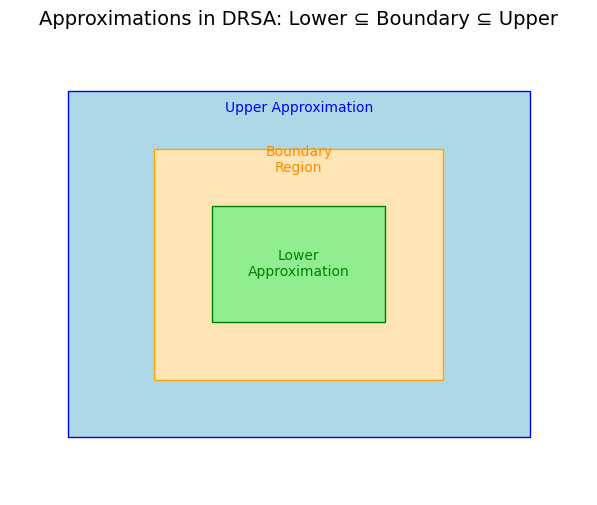

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the outer rectangle: Upper approximation
upper = patches.Rectangle((1, 1), 8, 6, edgecolor='blue', facecolor='lightblue', label='Upper Approximation')
ax.add_patch(upper)

# Draw the middle rectangle: Boundary region
boundary = patches.Rectangle((2.5, 2), 5, 4, edgecolor='orange', facecolor='moccasin', label='Boundary Region')
ax.add_patch(boundary)

# Draw the inner rectangle: Lower approximation
lower = patches.Rectangle((3.5, 3), 3, 2, edgecolor='green', facecolor='lightgreen', label='Lower Approximation')
ax.add_patch(lower)

# Add text labels inside each region
ax.text(5, 4, 'Lower\nApproximation', fontsize=10, ha='center', va='center', color='green')
ax.text(5, 5.8, 'Boundary\nRegion', fontsize=10, ha='center', va='center', color='darkorange')
ax.text(5, 6.7, 'Upper Approximation', fontsize=10, ha='center', va='center', color='blue')

# Set limits and formatting
ax.set_xlim(0, 10)
ax.set_ylim(0, 8)
ax.set_aspect('equal')
ax.axis('off')
plt.title("Approximations in DRSA: Lower ⊆ Boundary ⊆ Upper", fontsize=14)
plt.show()


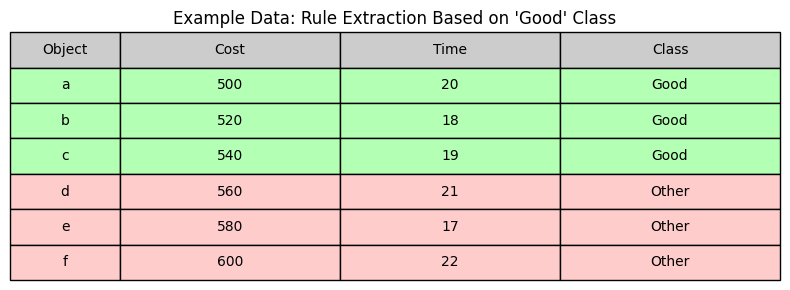

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.table import Table

# Example data: objects with two criteria and their class
data = {
    "Object": ["a", "b", "c", "d", "e", "f"],
    "Cost": [500, 520, 540, 560, 580, 600],
    "Time": [20, 18, 19, 21, 17, 22],
    "Class": ["Good", "Good", "Good", "Other", "Other", "Other"]
}

df = pd.DataFrame(data)

# Create the figure
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')

# Create the table
table = Table(ax, bbox=[0, 0, 1, 1])

# Column widths
col_widths = [0.1, 0.2, 0.2, 0.2]
columns = df.columns.tolist()

# Add table header
for i, col in enumerate(columns):
    table.add_cell(0, i, width=col_widths[i], height=0.3, text=col, loc='center', facecolor='#cccccc')

# Add data rows
for row_idx, row in df.iterrows():
    for col_idx, value in enumerate(row):
        color = '#b3ffb3' if row['Class'] == 'Good' else '#ffcccc'
        table.add_cell(row_idx + 1, col_idx, width=col_widths[col_idx], height=0.3, text=str(value),
                       loc='center', facecolor=color)

# Auto set font size
table.auto_set_font_size(False)
table.set_fontsize(10)

# Add the table to the plot
ax.add_table(table)

# Title
plt.title("Example Data: Rule Extraction Based on 'Good' Class", fontsize=12)
plt.tight_layout()
plt.show()


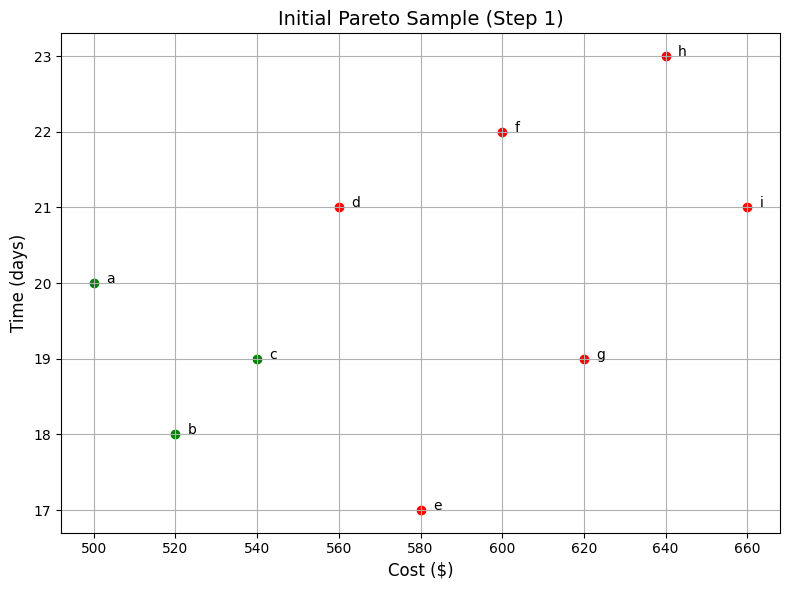

In [36]:
import matplotlib.pyplot as plt

# Sample points (cost, time)
points = {
    "a": (500, 20),
    "b": (520, 18),
    "c": (540, 19),
    "d": (560, 21),
    "e": (580, 17),
    "f": (600, 22),
    "g": (620, 19),
    "h": (640, 23),
    "i": (660, 21),
}

# Good and other classifications
good = {"a", "b", "c"}
other = set(points.keys()) - good

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot points
for label, (cost, time) in points.items():
    color = 'green' if label in good else 'red'
    ax.scatter(cost, time, color=color)
    ax.text(cost + 3, time, label, fontsize=10)

# Labels and formatting
ax.set_xlabel("Cost ($)", fontsize=12)
ax.set_ylabel("Time (days)", fontsize=12)
ax.set_title("Initial Pareto Sample (Step 1)", fontsize=14)
ax.grid(True)
plt.tight_layout()
plt.show()


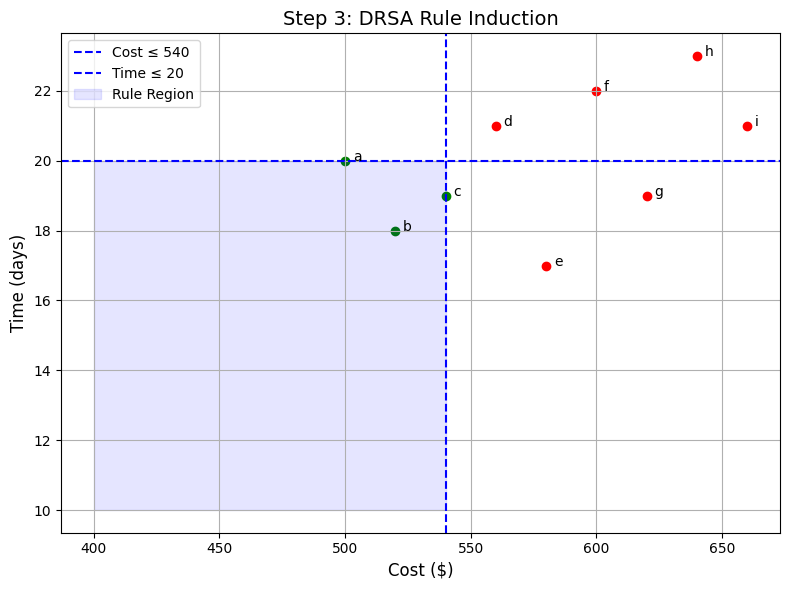

In [37]:
import matplotlib.pyplot as plt

# Sample points (cost, time)
points = {
    "a": (500, 20),
    "b": (520, 18),
    "c": (540, 19),
    "d": (560, 21),
    "e": (580, 17),
    "f": (600, 22),
    "g": (620, 19),
    "h": (640, 23),
    "i": (660, 21),
}

# Good classification
good = {"a", "b", "c"}
other = set(points.keys()) - good

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot points
for label, (cost, time) in points.items():
    color = 'green' if label in good else 'red'
    ax.scatter(cost, time, color=color)
    ax.text(cost + 3, time, label, fontsize=10)

# Highlight rule-based region: cost ≤ 540 and time ≤ 20
ax.axvline(x=540, color='blue', linestyle='--', label='Cost ≤ 540')
ax.axhline(y=20, color='blue', linestyle='--', label='Time ≤ 20')
ax.fill_betweenx([10, 20], 400, 540, color='blue', alpha=0.1, label='Rule Region')

# Labels and formatting
ax.set_xlabel("Cost ($)", fontsize=12)
ax.set_ylabel("Time (days)", fontsize=12)
ax.set_title("Step 3: DRSA Rule Induction", fontsize=14)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


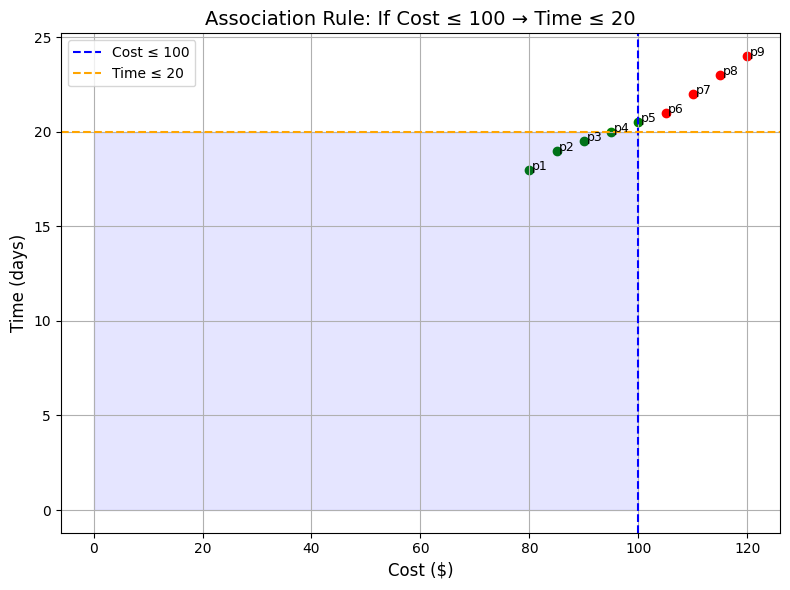

In [38]:
import matplotlib.pyplot as plt

# Generate data points (for illustrative purposes)
costs = [80, 85, 90, 95, 100, 105, 110, 115, 120]
times = [18, 19, 19.5, 20, 20.5, 21, 22, 23, 24]

# Split into two groups for visual clarity
group1 = [(c, t) for c, t in zip(costs, times) if c <= 100]
group2 = [(c, t) for c, t in zip(costs, times) if c > 100]

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot points
for (c, t) in group1:
    ax.scatter(c, t, color='green')
for (c, t) in group2:
    ax.scatter(c, t, color='red')

# Add labels
for i, (c, t) in enumerate(zip(costs, times)):
    ax.text(c + 0.5, t, f"p{i+1}", fontsize=9)

# Add rule threshold lines
ax.axvline(x=100, linestyle='--', color='blue', label='Cost ≤ 100')
ax.axhline(y=20, linestyle='--', color='orange', label='Time ≤ 20')

# Shaded implication region
ax.fill_betweenx([0, 20], 0, 100, color='blue', alpha=0.1)

# Labels and legend
ax.set_xlabel("Cost ($)", fontsize=12)
ax.set_ylabel("Time (days)", fontsize=12)
ax.set_title("Association Rule: If Cost ≤ 100 → Time ≤ 20", fontsize=14)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


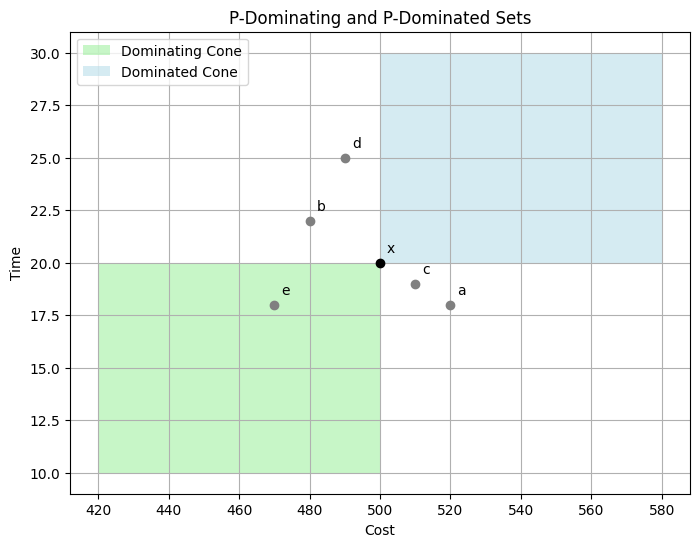

In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define objective values (e.g., cost, time)
points = {
    'x': (500, 20),  # Reference point
    'a': (520, 18),
    'b': (480, 22),
    'c': (510, 19),
    'd': (490, 25),
    'e': (470, 18)
}

# Extract reference point
x_cost, x_time = points['x']

fig, ax = plt.subplots(figsize=(8, 6))

# Plot all points
for label, (cost, time) in points.items():
    color = 'black' if label == 'x' else 'gray'
    ax.scatter(cost, time, color=color, zorder=3)
    ax.text(cost + 2, time + 0.5, label, fontsize=10)

# Shade P-dominating cone (y dominates x: y ≤ x component-wise)
cone_width = 80
cone_height = 10
ax.add_patch(
    patches.Rectangle(
        (x_cost - cone_width, x_time - cone_height),
        cone_width,
        cone_height,
        linewidth=0,
        edgecolor='none',
        facecolor='lightgreen',
        alpha=0.5,
        label='Dominating Cone'
    )
)

# Shade P-dominated cone (x dominates y: y ≥ x component-wise)
ax.add_patch(
    patches.Rectangle(
        (x_cost, x_time),
        cone_width,
        cone_height,
        linewidth=0,
        edgecolor='none',
        facecolor='lightblue',
        alpha=0.5,
        label='Dominated Cone'
    )
)

ax.set_xlabel("Cost")
ax.set_ylabel("Time")
ax.set_title("P-Dominating and P-Dominated Sets")
ax.legend()
plt.grid(True)
plt.show()
